#### 1. Dataframe basics

In [11]:
pip install pandas


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


#### 1.1. Import pandas and reffered the package as pd + Load "telecom_churn.csv" and assign in to the variable df <span style= color:#0033cc>(3 points)</span>

In [12]:
import pandas as pd

#### 1.2 Return the column labels/names <span style= color:#0033cc>(2 points)</span>

In [13]:
df = pd.read_csv("telecom_churn.csv")
df.head()
df.columns.tolist()

['State',
 'Account length',
 'Area code',
 'International plan',
 'Voice mail plan',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls',
 'Churn']

#### 1.3 Print the df shape <span style= color:#0033cc>(3 points)</span>

In [ ]:
df.shape

#### 2. What is the total day calls given by state and area code? 

#### 2.1 Group the df by state and area code (assign it to grouped variable). <span style= color:#0033cc>(5 points)</span>

In [ ]:
group = df.groupby(['State','Area code'])['Total day calls']
group 

#### 2.2 Use agg with the desired function sum to get the final answer (assign it to telecom_agg variable).<span style= color:#0033cc>(5 points)</span>

In [ ]:
telecom_agg= group.agg('sum')
telecom_agg

#### 2.3 Reset the group by index <span style= color:#0033cc>(3 points)</span>

In [ ]:
df.reset_index(inplace=True)

#### 2.4 Use head function to review the first 10 telecom_agg rows <span style= color:#0033cc>(3 points)</span>

In [ ]:
telecom_agg.head(10)

#### 3. Users Churn rate

#### 3.1 Change "Churn" column type to an integer: <span style= color:#0033cc>(3 points)</span>

In [10]:
df["Churn"] = df["Churn"].astype(int)

#### 3.2 what is the users "churn rate" in our dataframe? <span style= color:#0033cc>(5 points)</span>
Hint: the churn rate formula can be calculated as the "number of churned" divided by the "total number of customers".

In [14]:
Total = df['Churn'].sum()/df["Churn"].count()
Total

0.14491449144914492

#### 3.3  How the charn rate can affect on the company? <span style= color:#0033cc>(3 points)</span>

In [16]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_corr = df[numeric_columns].corr()
df_corr

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
Account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796
Area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572
Number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263
Total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423
Total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942
Total day charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427
Total eve minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985
Total eve calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423
Total eve charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987
Total night minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288


#### 3.4 How much time (on average) do churned users spend on the phone during daytime? <span style= color:#0033cc>(5 points)</span>
Hint: filter churn column when the value of churn equal to 1

In [19]:
df_avg = df[df["Churn"] == 1]["Total day calls"].mean()
df_avg

101.33540372670808

#### 3.5 What is the maximum length of international calls among loyal users who do not have an international plan? ('International plan' == 'No') <span style= color:#0033cc>(5 points)</span>
Hint: 2 filters conditions,churn equal to 0 and international plan equal to no

In [15]:
df_length = df[df["Churn"] == 0][df["International plan"] == "No"]["Total intl minutes"].max()
df_length

C:\Users\huser\AppData\Local\Temp\ipykernel_33552\1503691764.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_length = df[df["Churn"] == 0][df["International plan"] == "No"]["Total intl minutes"].max()


18.9

#### 4. Select top 3 international plan subscribers and non subscribers with the most intl calls

#### 4.1. Build a function top which attributes df, n (for the top n) and column. In this function use sort_values to sort the values in the column specified. <span style= color:#0033cc>(10 points)</span>
Note: Do not apply the function on the whole data frame (e.i. top(df, n=3)) as the output will be the top 3 regardless of subscribers and non-subscribers.

In [27]:
def top(df, n, column):
    return df.sort_values(by = column, ascending=False).head(n)

#### 4.2. Group the df dataframe by 'International plan' and use apply(top) to apply this function. <span style= color:#0033cc>(5 points)</span>

In [28]:
df.groupby("International plan").apply(top, n = 3, column = "Total intl minutes")

C:\Users\huser\AppData\Local\Temp\ipykernel_33552\1204240986.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby("International plan").apply(top, n = 3, column = "Total intl minutes")


State  Account length  Area code International plan  \
International plan                                                            
No                 314     ID             128        408                 No   
                   1816    OR              53        415                 No   
                   2816    ID             130        415                 No   
Yes                115     ME              36        510                Yes   
                   1420    MI              81        415                Yes   
                   214     FL              70        510                Yes   

                        Voice mail plan  Number vmail messages  \
International plan                                               
No                 314               No                      0   
                   1816              No                      0   
                   2816              No                      0   
Yes                115              Yes                     42   
                   1420              No                      0   
                   214               No                      0   

                         Total day minutes  Total day calls  Total day charge  \
International plan                                                              
No                 314               125.2               99             21.28   
                   1816              184.8               98             31.42   
                   2816              263.7              113             44.83   
Yes                115               196.8               89             33.46   
                   1420              149.4               68             25.40   
                   214               226.7               98             38.54   

                         Total eve minutes  Total eve calls  Total eve charge  \
International plan                                                              
No                 314               205.4              107             17.46   
                   1816              216.4              125             18.39   
                   2816              186.5              103             15.85   
Yes                115               254.9              122             21.67   
                   1420              171.9               98             14.61   
                   214               228.1              115             19.39   

                         Total night minutes  Total night calls  \
International plan                                                
No                 314                 254.4                111   
                   1816                141.1                116   
                   2816                195.3                 99   
Yes                115                 138.3                126   
                   1420                214.5                 97   
                   214                  73.2                 93   

                         Total night charge  Total intl minutes  \
International plan                                                
No                 314                11.45                18.9   
                   1816                6.35                18.4   
                   2816                8.79                18.3   
Yes                115                 6.22                20.0   
                   1420                9.65                17.9   
                   214                 3.29                17.6   

                         Total intl calls  Total intl charge  \
International plan                                             
No                 314                  2               5.10   
                   1816                 3               4.97   
                   2816                 6               4.94   
Yes                115                  6               5.40   
                   1420                 3               4.83   
                   214                  4 

#### 5. pd.crosstab

#### 5.1 how the observations in our sample are normalized (divide each value by the sum of the values) in the context of two variables - Churn and Voice mail plan. To do so, build a contingency table using the crosstab method. <span style= color:#0033cc>(6 points)</span>
Hint: To normalize using all values, simply set normalize=True

In [31]:
crosstab_table = pd.crosstab(df["Churn"], df["Voice mail plan"], normalize=True)
crosstab_table

Voice mail plan,No,Yes
Churn,,
False,0.602460,0.252625
True,0.120912,0.024002


#### 5.2 What is the conclustion of most of users regarding voice mail usage? <span style= color:#0033cc>(4 points)</span>

רוב המתמשים לא בעד שימוש בדואר קולי

#### 6. Columns calculations

#### 6.1 Add a column name 'total_charge', and get the total charge by sum all the charge columns <span style= color:#0033cc>(7 points)</span>

In [33]:
df['total_charge']=df["Total intl charge"]+df["Total night charge"]+df["Total eve charge"]+df["Total day charge"]
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,total_charge
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,75.56
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,59.24
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,62.29
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,66.80
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,52.09


####  6.2 Add a column name 'Day_charge_pct', and get day charge precentage of total charge by dividing the column 'Total day charge' by the column 'total_charge'. <span style= color:#0033cc>(7 points)</span>

In [36]:
df['Day_charge_pct'] = df['Total day charge']/df['total_charge']
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,total_charge,Day_charge_pct
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,False,75.56,0.596480
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,False,59.24,0.463707
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,False,62.29,0.664312
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,False,66.80,0.761976
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,False,52.09,0.544058


#### 7. Day charge percentage and state visualization

#### 7.1 Import matplotlib.pyplot and referred the package as plt <span style= color:#0033cc>(2 points)</span>

In [40]:
pip install matplotlib

  Using cached matplotlib-3.8.3-cp310-cp310-win_amd64.whl.metadata (5.9 kB)
  Using cached contourpy-1.2.0-cp310-cp310-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
Using cached matplotlib-3.8.3-cp310-cp310-win_amd64.whl (7.6 MB)
Using cached contourpy-1.2.0-cp310-cp310-win_amd64.whl (186 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
import matplotlib.pyplot as plt

#### 7.2 create new string list with the name 'my_color' that contains the following colors names: red,green,orange,blue,yellow <span style= color:#0033cc>(4 points)</span>

In [44]:
my_color = ["red","green","orange","blue","yellow"]

#### 7.3 Bar chart plot <span style= color:#0033cc>(10 points)</span>

1.Select first 5 rows of the dataframe (use df.iloc[]) 

2.Use <span style= color:blue>df.plot</span> function with kind='bar' and x='State' and y='Day_charge_pct' and color = my_colors to make a simple bar chart plot (of the day chart %).

3.Use <span style= color:blue>plt.xlabel("State Code")</span> and <span style= color:blue>plt.ylabel("Day Charge %")</span> to label the corresponding axes

Text(0, 0.5, 'Day Charge %')

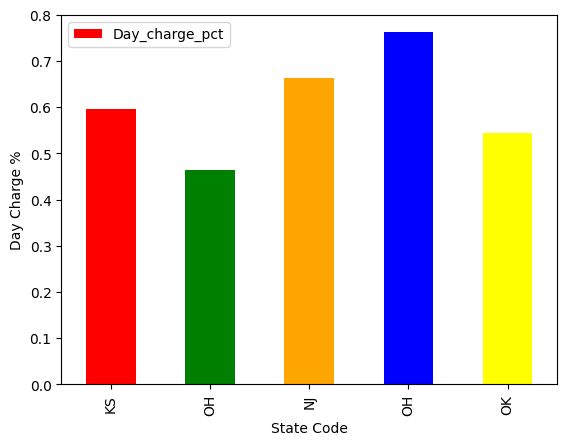

In [61]:
five_first = df.iloc[:5]
five_first.plot(kind='bar', x='State', y='Day_charge_pct', color = my_color)
plt.xlabel("State Code")
plt.ylabel("Day Charge %")